In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

## Enron Email Dataset
https://www.kaggle.com/wcukierski/enron-email-dataset

In [10]:
data = pd.read_csv('data/enron/emails_small.csv').fillna('')

In [11]:
def filterby_date(df, start_date='1979-01-01', end_date='2005-01-01'):
    return data[(data.date>=start_date)&(data.date<=end_date)].reset_index(drop=True)

def filter_poi(df, poi):
    return df[(df.sender.isin(poi))|(df.recipient1.isin(poi))|(df.recipient2.isin(poi))|(df.recipient3.isin(poi))]

def search_emails(df, query, by_name=True, by_org=False, by_text=False):
    results = pd.DataFrame()
    
    if by_name:
        results = pd.concat([
            results,
            df[df.sender.apply(lambda x: x.split('@')[0]).str.contains(query)]
        ])

    if by_org:
        results = pd.concat([
            results,
            df[df.sender.apply(lambda x: x.split('@')[-1]).str.contains(query)]
        ])

    if by_text:
        results = pd.concat([
            results,
            df[df.text.str.contains(query)]
        ])
    return results.sort_values(by='date').drop_duplicates()

data_view = filterby_date(data, start_date='2001-05-01', end_date='2002-01-01')

In [17]:
search_emails(data, 'ljm')

,date,subject,sender,recipient1,recipient2,recipient3,text
12549,2001-05-01 05:48:00,AOL Instant Messenger Confirmation,oy67ujept7ryzi6.ljmenron@aol,larry.may@enron,,,Thank you for registering for the AOL Instant ...
12666,2001-05-01 14:48:00,AOL Instant Messenger Confirmation,oy67ujept7ryzi6.ljmenron@aol,larry.may@enron,,,Thank you for registering for the AOL Instant ...


In [18]:
poi = ['larry.may@enron', 'jeffrey.gossett@enron', 'errol.mclaughlin@enron']
data_graph = filter_poi(data, poi)

In [19]:
data_graph

,date,subject,sender,recipient1,recipient2,recipient3,text
298,2001-01-04 02:57:00,Re: Your Amazon.com order (#104-5261237-5699137),errol.mclaughlin@enron,orders@amazon,,,I paid extra for the 2 Business Day delivery f...
452,2001-01-05 07:29:00,Re: Message Board for Price and Gas Daily,errol.mclaughlin@enron,kulvinder.fowler@enron,,,"Please let me know your login ID. Thanks, Errol"
568,2001-01-08 06:22:00,Re: Samsung Event Prize,errol.mclaughlin@enron,min528@co,,,I have not received the package yet. Please ad...
651,2001-01-09 03:17:00,Re: Option deal - QK3903,errol.mclaughlin@enron,dawn.kenne@enron,,,I corrected it. Thanks for the heads up. Errol
685,2001-01-09 07:45:00,Re: FT-NW-XL-OPT spreadsheets,errol.mclaughlin@enron,nancy.hernandez@enron,,,Please speak with Jason Wolfe regarding this f...
...,...,...,...,...,...,...,...
39047,2002-02-05 07:48:29,,brad.jones@enron,larry.may@enron,,,"Larry, Let me know when you are in today. I am..."
39242,2002-02-06 11:08:30,UBS Group,errol.mclaughlin@enron,andy.zipper@enron,,,"Andy, How are you doing? Will you be in John L..."
39280,2002-02-06 12:32:47,Access to UBSWenergy Production Environment,claudia.clark@enron,errol.mclaughlin@enron,,,Your PRODUCTION User ID and Password has been ...
39289,2002-02-06 13:08:38,Access to UBSWenergy Production Environment,stephanie.sever@enron,larry.may@enron,,,IMPORTANT - THE IDS BELOW WILL BE YOUR PERMANE...


In [23]:
get_text_view(data_graph, 'larry.may@enron')

{'2001-01-22 08:42:00, Re: Correlation, bob.lee@enron': "I'll talk to you about it tomorrow. Thanks Larry",
 '2001-02-15 05:18:00, Re: 3 pm, caroline.abramo@enron': 'I have a dental appointment in the Post Oak area at 400pm. I can meet until 410 or so.',
 "2001-03-28 05:00:00, Re: FW: Larry's, george.huan@enron": 'It is what I expected, Thanks Larry',
 '2001-04-02 06:16:00, Re: meeting, sunil.dalal@enron': 'Sorry for the late notice, I forgot I had a dentist appointment at 3:00, I can meet any other day this week. Thanks Larry',
 '2001-04-02 06:48:00, RE: meeting, sunil.dalal@enron': 'That will be fine',
 '2001-04-11 06:19:00, Re: EnronOnline, bryan.hull@enron': 'For gas daily options it is Eric Sandberg and Lance Jordan',
 '2001-05-10 02:04:00, Re: Gas Daily O, bill.kyle@enron': 'how about today (Thurs) 3pm we can find a conference room',
 '2001-05-10 03:40:00, RE: Gas Daily O, bill.kyle@enron': 'Could you find one please',
 '2001-05-10 12:04:00, Re: Gas Daily O, bill.kyle@enron': 'ho

In [ ]:
data1 = [0, 1, 2]
data2 = [2, 1, 0]
data3 = [0, 1, 0]

plots = {
    "First chart": data1,
    "Second chart": data2,
    "Third chart": data3,
}

plot = st.sidebar.selectbox("Select your chart.", list(plots.keys()))

st.line_chart(plots[plot])

In [ ]:
search_emails

In [22]:
# list(data_view[data_view.sender.str.contains('larry\.may')].recipient1.unique())
# list(data_view[data_view.recipient1.str.contains('larry\.may')].sender.unique())

## Graph Models

In [23]:
from graph_utils import make_circos, get_centrality, get_betweenness

In [26]:
G = nx.from_pandas_edgelist(
    data, 
    'sender', 
    'recipient1', 
    edge_attr=['date', 'subject'], 
    create_using=nx.DiGraph
)
nx.set_node_attributes(G, dict(map(lambda x: (x, {'name':x.split('@')[0], 'org': x.split('@')[-1]}), G.nodes)))

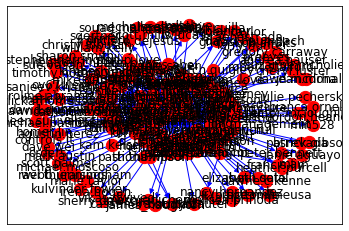

In [15]:
test = nx.draw_networkx(G, pos, node_size=150, node_color='red', with_labels=True, edge_color='blue', labels=names)

In [17]:
test  =plt.show()

In [18]:
test

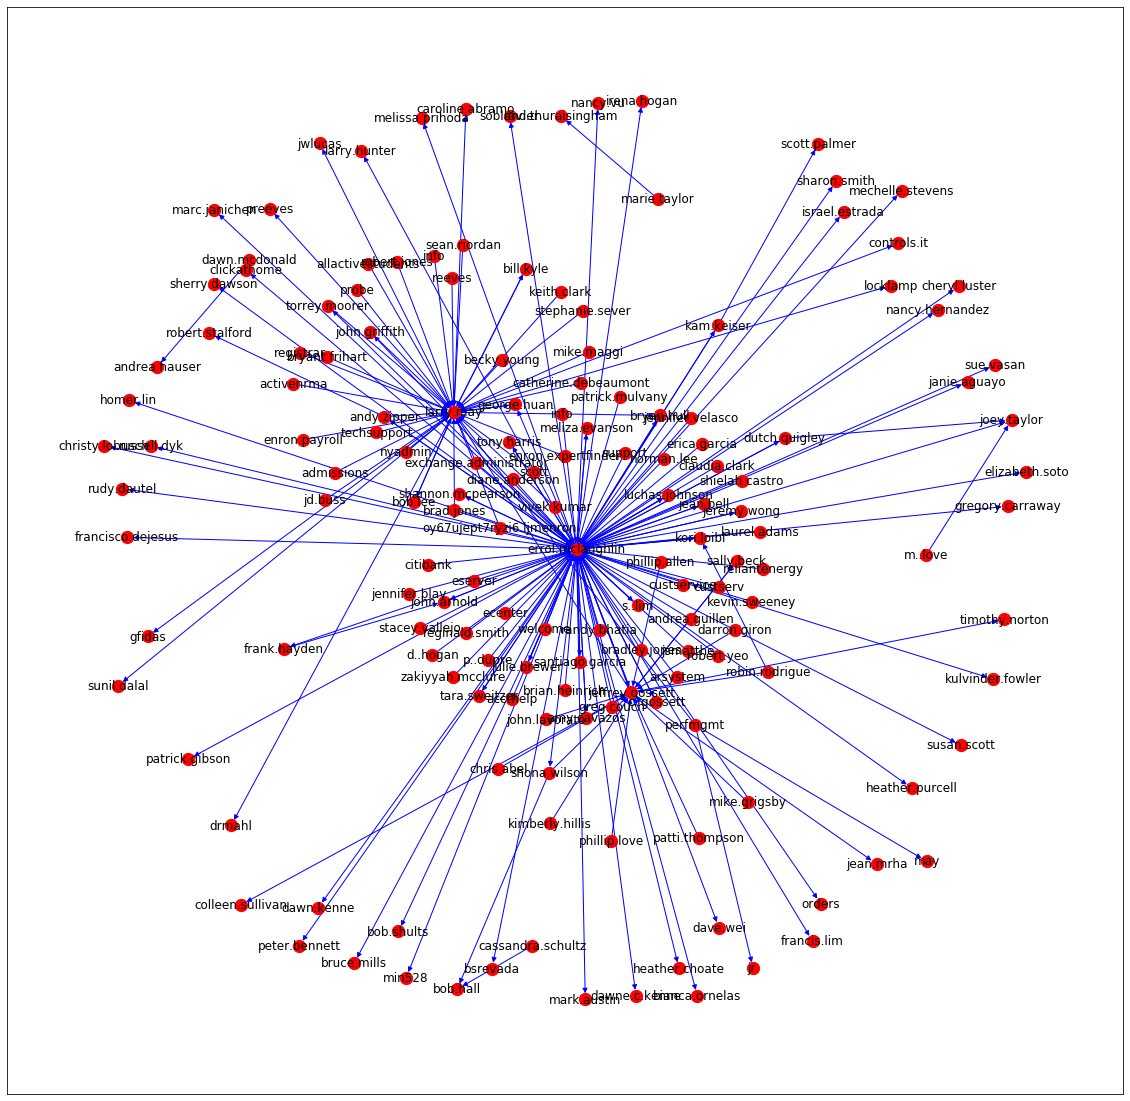

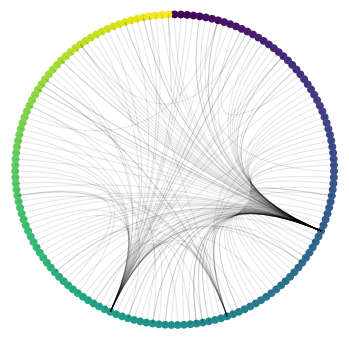

<Figure size 576x576 with 0 Axes>

In [27]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=.3)
names = nx.get_node_attributes(G, 'name')
nx.draw_networkx(G, pos, node_size=150, node_color='red', with_labels=True, edge_color='blue', labels=names)
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
c = make_circos(G, ax)
c.draw()

pass;

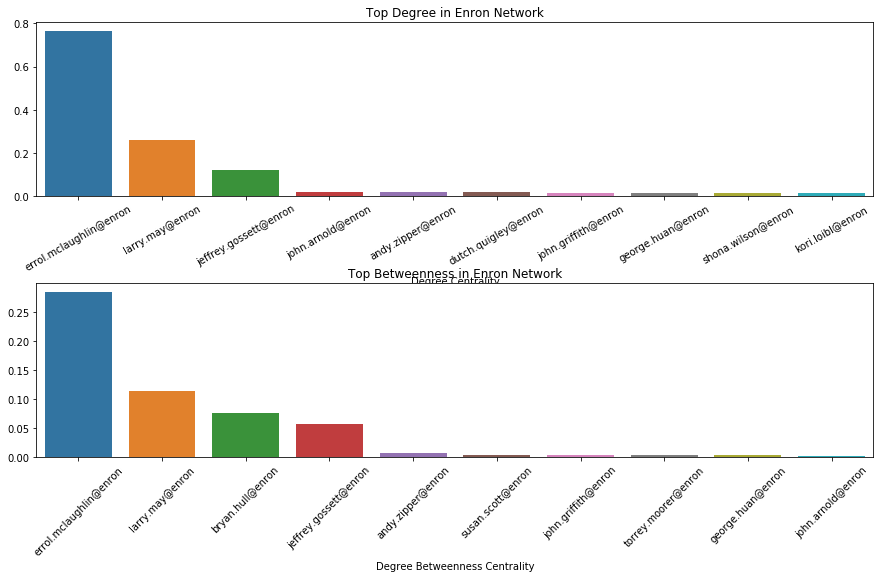

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

cent = get_centrality(G)
centplot = sns.barplot(ax=axs[0], y='centrality', x='name', data=cent.replace({r'\.com$':r''}, regex=True)[:10])
axs[0].set_xlabel('Degree Centrality')
axs[0].set_ylabel('')
axs[0].set_title('Top Degree in Enron Network')
plt.setp(centplot.get_xticklabels(), rotation=30)

bet = get_betweenness(G)
betplot = sns.barplot(ax=axs[1], y='betweenness', x='name', data=bet.replace({r'\.com$':r''}, regex=True)[:10])
axs[1].set_xlabel('Degree Betweenness Centrality')
axs[1].set_ylabel('')
axs[1].set_title('Top Betweenness in Enron Network')
plt.setp(betplot.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.5)
pass;

In [11]:
G.nodes['larry.may@enron']

{'name': 'larry.may', 'org': 'enron'}

In [12]:
nx.to_dict_of_dicts(G)['larry.may@enron']
nx.to_dict_of_dicts(G)['oy67ujept7ryzi6.ljmenron@aol']

{'becky.young@enron': {'date': '2000-07-05 02:49:00',
  'subject': 'Re: PIRA Natural Gas Briefing'},
 'stephen.harrington@enron': {'date': '2000-09-07 05:28:00',
  'subject': 'eol quotes speadsheet'},
 'sanjeev.khanna@enron': {'date': '2000-12-11 08:16:00',
  'subject': 'Re: Daily Vols for Transco Zn 6'},
 'bob.lee@enron': {'date': '2001-01-22 08:42:00',
  'subject': 'Re: Correlation Skew'},
 'caroline.abramo@enron': {'date': '2001-02-15 05:18:00',
  'subject': 'Re: 3 pm'},
 'george.huan@enron': {'date': '2001-03-28 05:00:00',
  'subject': "Re: FW: Larry's Question"},
 'sunil.dalal@enron': {'date': '2001-04-02 06:48:00',
  'subject': 'RE: meeting'},
 'bryan.hull@enron': {'date': '2001-04-11 06:19:00',
  'subject': 'Re: EnronOnline Options'},
 'bill.kyle@enron': {'date': '2001-05-10 13:40:00',
  'subject': 'RE: Gas Daily Options'},
 'jwlucas@erols': {'date': '2001-09-24 13:57:04',
  'subject': 'RE: An AMU student'},
 'controls.it@enron': {'date': '2001-09-25 13:30:39',
  'subject': 're:

{'larry.may@enron': {'date': '2001-05-01 14:48:00',
  'subject': 'AOL Instant Messenger Confirmation'}}

In [23]:
from run_clean import name_org

In [50]:
names = nx.get_node_attributes(G, 'name')

In [53]:
color_map

{'ZBQMLN': 'green',
 'UXUNXP': 'royalblue',
 'LOTXCM': 'red',
 'ETCZJS': 'orange',
 'VEDGJQ': 'cyan'}

In [54]:
nodes_by_color

{'green': ['RDWSAC', 'ZLUMUL', 'ITXEDT', 'RXFBLY', 'JWRYZX', 'LLKXBU'],
 'royalblue': ['CORTLK', 'RGOZXJ', 'XFLVOM', 'QSRMHE', 'IEMPPE', 'LWNBDK'],
 'red': ['UXTWBF', 'HZKPBO', 'IODXMC', 'TLONLB', 'JWJRFE', 'GKSBCI'],
 'orange': ['IDKAPS', 'CAZVIS', 'SOGJPU', 'IBAUOR', 'JXEYJJ', 'UPKYFU'],
 'cyan': ['ORPDQV', 'KWGUYT', 'ELPTMV', 'ASGWOQ', 'OQCXJF', 'RBGKLV']}

In [58]:
import matplotlib.colors as mcolors

In [84]:
import random
random.seed(7)
colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(colors)
colors[:10]

['lightseagreen',
 'navajowhite',
 'firebrick',
 'darkseagreen',
 'lavenderblush',
 'darkgreen',
 'darkkhaki',
 'mintcream',
 'olivedrab',
 'greenyellow']

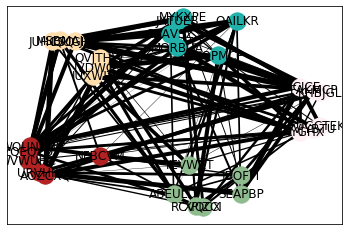

In [91]:
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random


# Random string generator
def rand_string(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))


# Set up a nodes and networks randomly
nodes = [rand_string() for _ in range(30)]
networks = [rand_string() for _ in range(5)]
networks_list = networks*6
random.shuffle(networks_list)

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = colors[:5]
color_map = dict(zip(networks, colors))

graph = nx.Graph()
graph.add_nodes_from(nodes)
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in colors}

# Take random sparse matrix as adjacency matrix
mat = sparse_random(30, 30, density=0.3).todense()
for row, row_val in enumerate(nodes):
    for col, col_val in enumerate(nodes):
        if col > row and mat[row, col] != 0.0: # Stick to upper half triangle, mat is not symmetric
            graph.add_edge(row_val, col_val, weight=mat[row, col])

# Choose a layout to visualize graph
######################## pos = nx.spring_layout(graph)


import numpy as np
pos = nx.circular_layout(graph)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(colors))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
        
color_pos = dict(zip(nodes_by_color.keys(), range(len(nodes_by_color))))

for ea in pos.keys():
    #color = 'black'
    posx = 0
    
    for c, p in color_pos.items():
        
        if ea in nodes_by_color[c]:
            #color = 'green'
            posx = p

    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]


#################################
edges = graph.edges()

# Get the edge weights and normalize them 
weights = [abs(graph[u][v]['weight']) for u, v in edges]
weights_n = [5*float(i)/max(weights) for i in weights] # Change 5 to control thickness

# First draw the nodes 
plt.figure()
for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

# Then draw edges with thickness defined by weights_n
nx.draw_networkx_edges(graph, pos=pos, width=weights_n)
nx.draw_networkx_labels(graph, pos=pos)
plt.show()
pass;